In [ ]:
from IPython.display import HTML
from matplotlib import animation
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


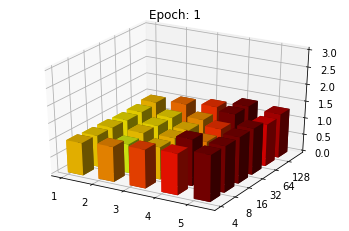

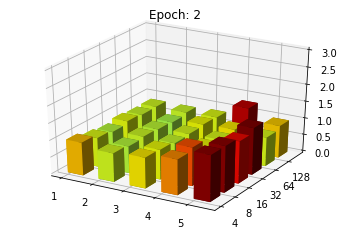

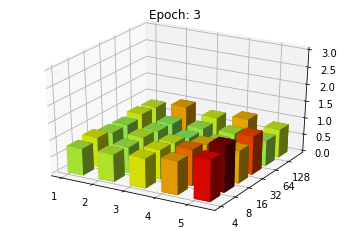

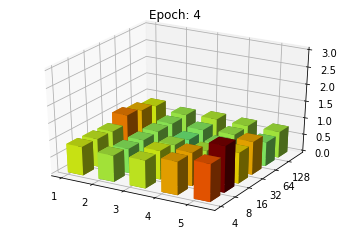

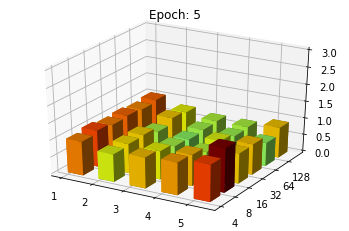

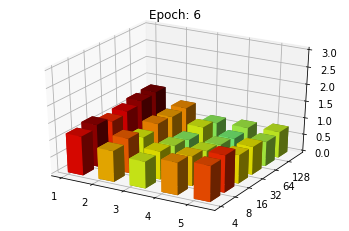

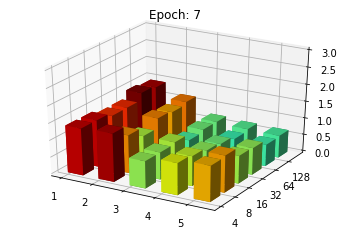

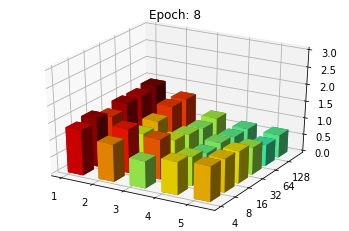

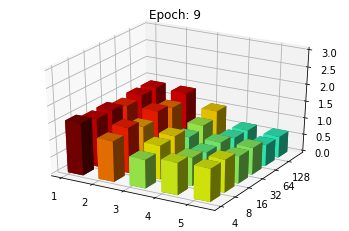

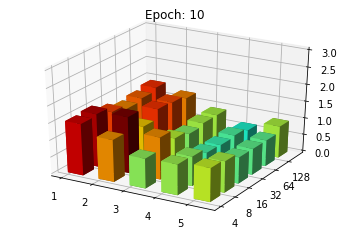

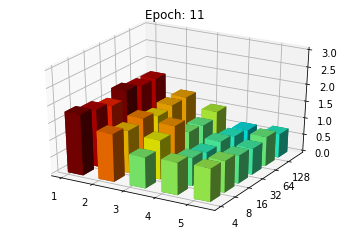

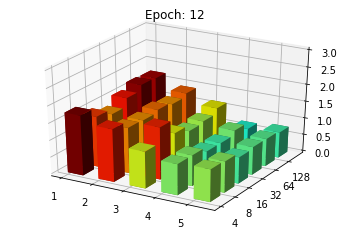

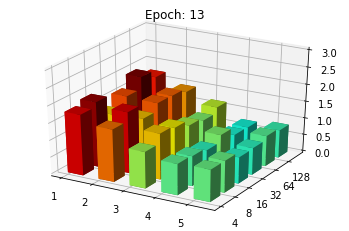

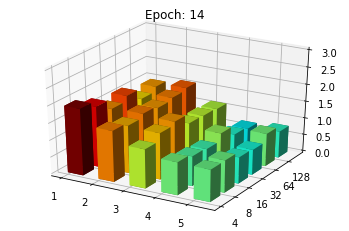

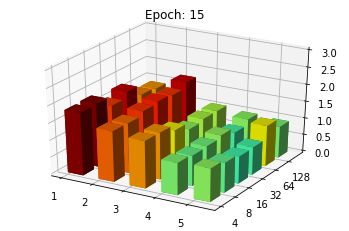

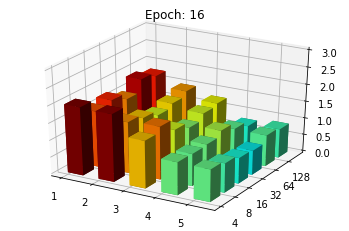

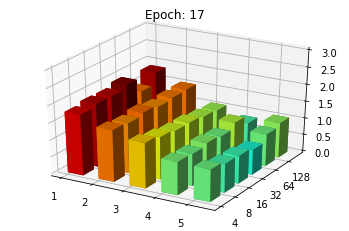

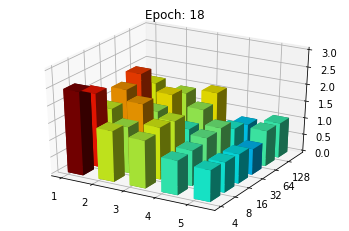

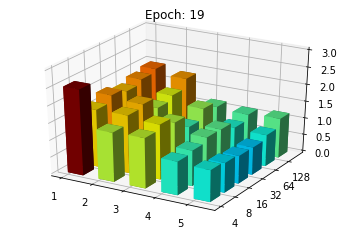

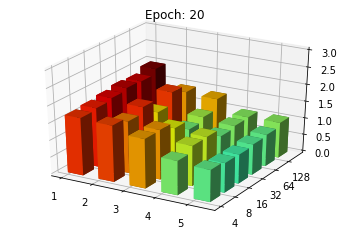

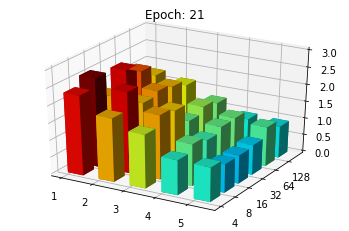

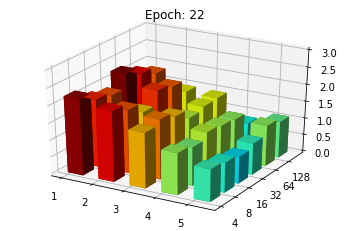

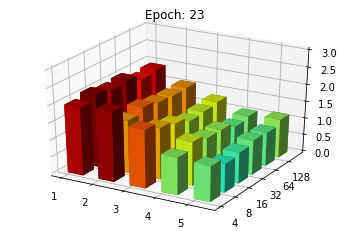

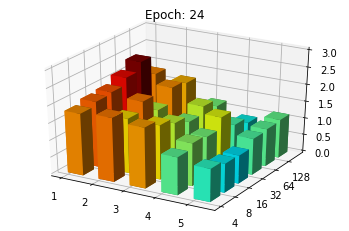

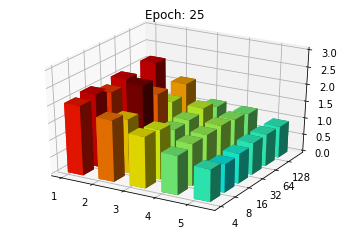

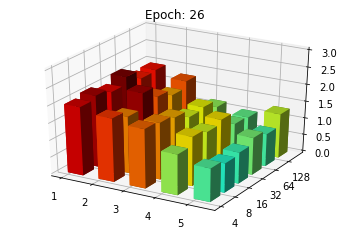

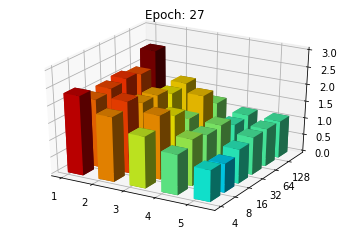

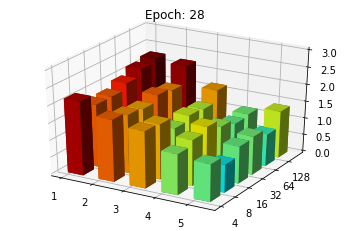

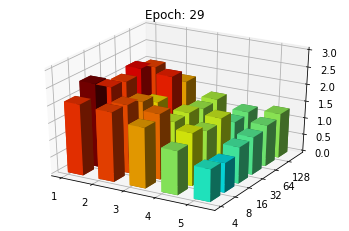

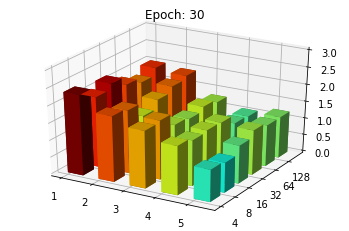

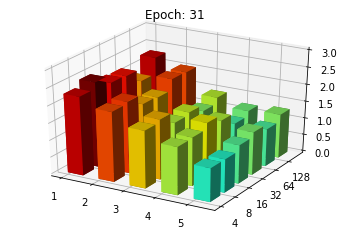

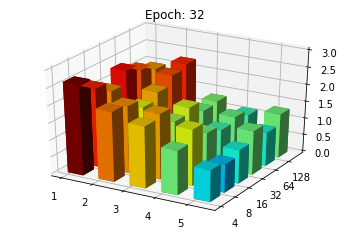

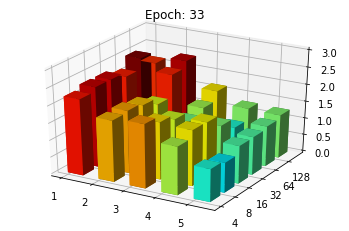

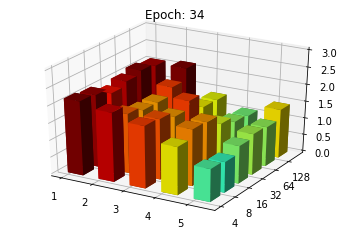

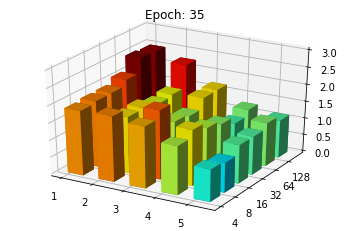

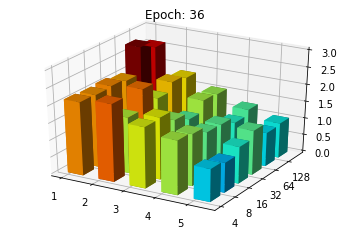

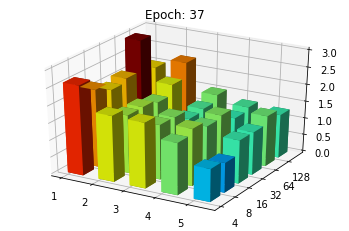

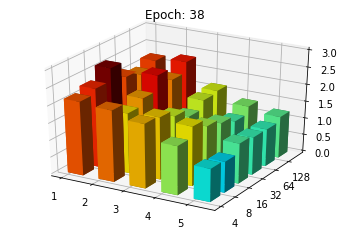

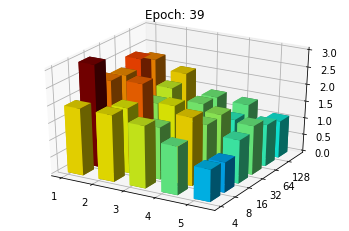

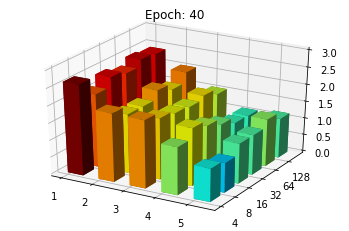

In [ ]:
base0 = "/content/drive/MyDrive/271 Project/model histories/"
base1 = "_layers_"
base2 = "_filters_relu_activation_history.csv"

layers = [1, 2, 3, 4, 5]
filtersInd = [1, 2, 3, 4, 5, 6]
filters = [4, 8, 16, 32, 64, 128]

for k in range(40):
  histogram = "/content/drive/MyDrive/271 Project/Val_Loss/vloss"
  primary_df = []
  fig = plt.figure()
  ax = fig.add_subplot(projection='3d')
  for i in layers: #here
    for j in filters:
      gen = base0+str(i)+base1+str(j)+base2
      df = pd.read_csv(gen)
      req_data = df.iloc[k]
      val = req_data['val_loss']
      primary_df.append(val)
  x, y = layers, filtersInd

  colors = plt.cm.jet(primary_df/max(primary_df))

  xpos, ypos = np.meshgrid(x, y, indexing="ij")
  xpos = xpos.ravel()
  ypos = ypos.ravel()
  zpos = 0

  dx = 0.5
  dy = 0.7
  dz = primary_df

  ax.set_zlim(0, 3)

  plt.yticks(filtersInd, filters)
  ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color = colors)
  plt.title("Epoch: " + str(k+1))


  plt.show()
  histogram = histogram + str(k) + ".png"

  fig.savefig(histogram)